In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("gambar1.jpg")

In [5]:
img.shape

(1608, 2858, 3)

In [33]:
img = cv2.imread("gambar1.jpg")          # Baca gambar (BGR)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB

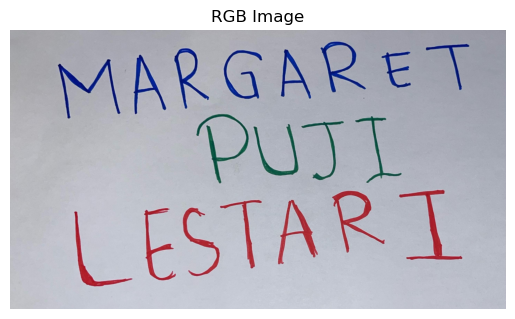

In [35]:
plt.imshow(rgb)      # Tampilkan gambar dalam warna yang benar
plt.title("RGB Image")
plt.axis("off")
plt.show()

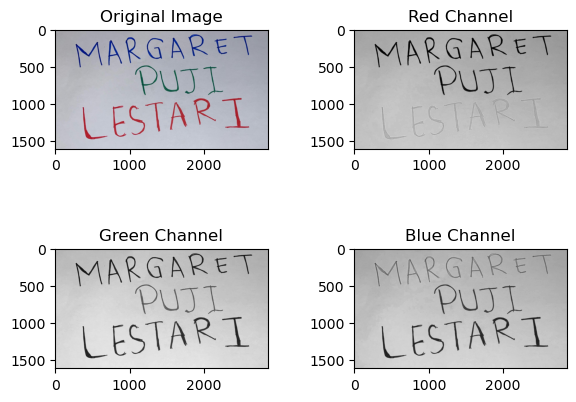

In [37]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)  # TIDAK perlu konversi ulang
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(rgb[:, :, 0], cmap="gray")  # Red
plt.title("Red Channel")

plt.subplot(2, 2, 3)
plt.imshow(rgb[:, :, 1], cmap="gray")  # Green
plt.title("Green Channel")

plt.subplot(2, 2, 4)
plt.imshow(rgb[:, :, 2], cmap="gray")  # Blue
plt.title("Blue Channel")

plt.tight_layout(pad=3.0)
plt.show()



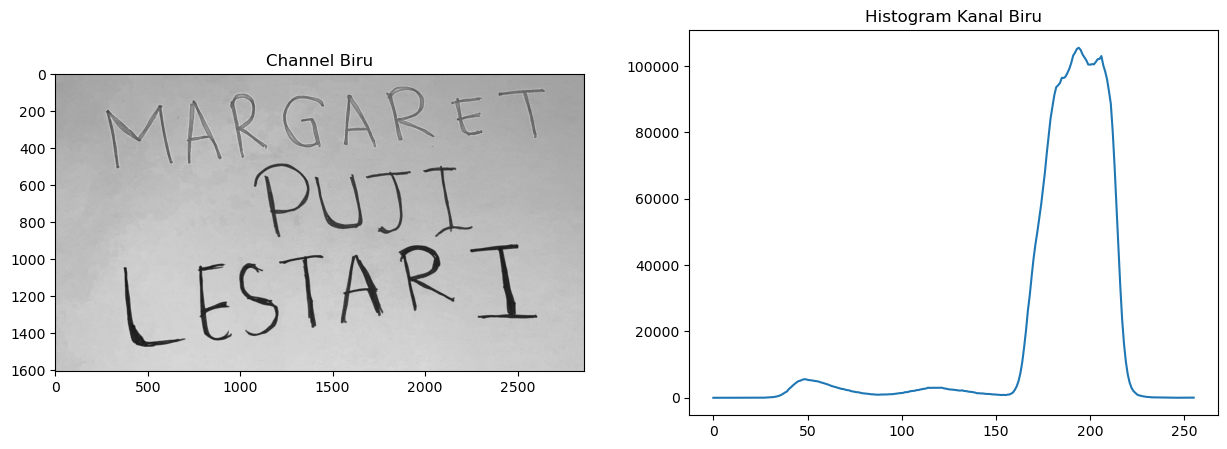

In [39]:
# Ambil channel biru dari gambar RGB
biru = rgb[:, :, 2]

# Buat histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([biru], [0], None, [256], [0, 256])

axs[0].imshow(biru, cmap='gray')
axs[0].set_title("Channel Biru")
axs[1].plot(hist)
axs[1].set_title("Histogram Kanal Biru")
plt.show()



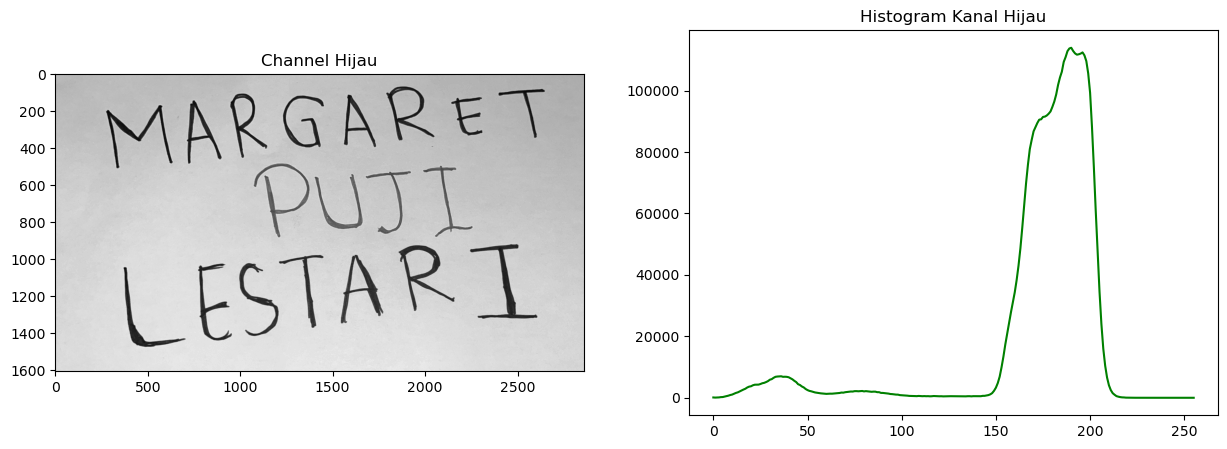

In [43]:
# Ambil channel hijau dari gambar RGB
hijau = rgb[:, :, 1]

# Buat histogram
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([hijau], [0], None, [256], [0, 256])

# Tampilkan hasil channel hijau dan histogramnya
axs[0].imshow(hijau, cmap='gray')
axs[0].set_title("Channel Hijau")
axs[1].plot(hist, color='green')
axs[1].set_title("Histogram Kanal Hijau")
plt.show()


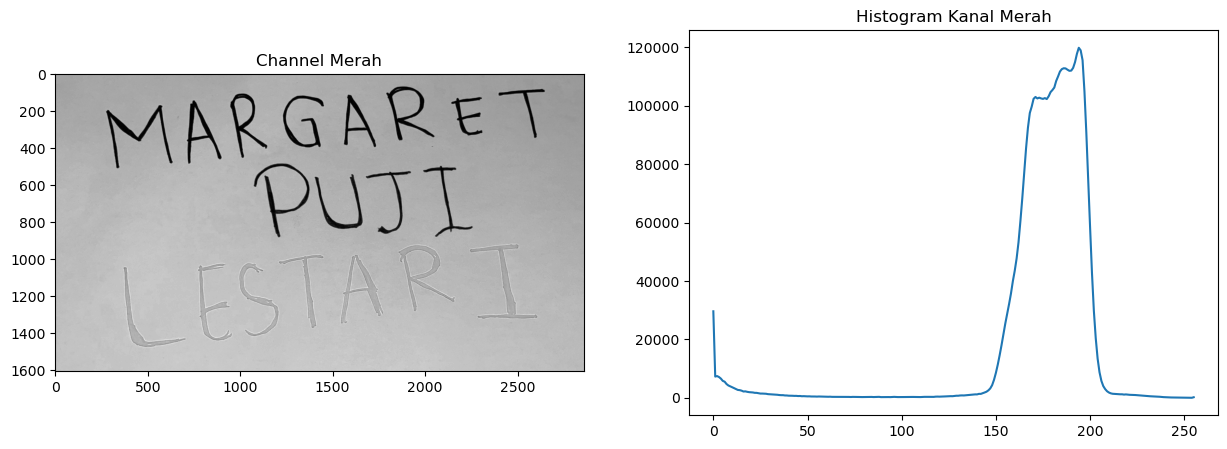

In [41]:
# Ambil channel merah langsung dari RGB
merah = rgb[:, :, 0]

# Plot hasil
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hist = cv2.calcHist([merah], [0], None, [256], [0, 256])

axs[0].imshow(merah, cmap='gray')
axs[0].set_title("Channel Merah")
axs[1].plot(hist)
axs[1].set_title("Histogram Kanal Merah")
plt.show()


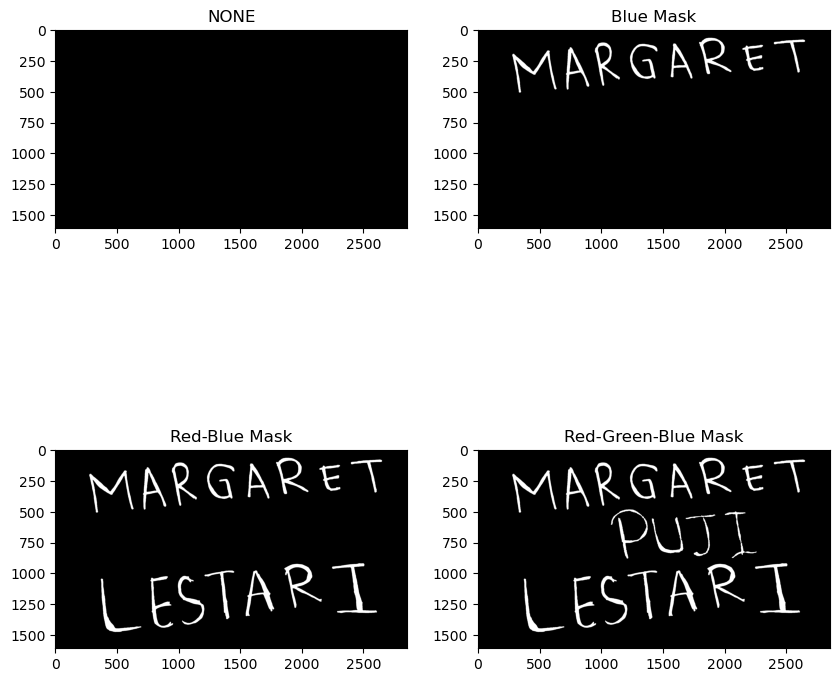

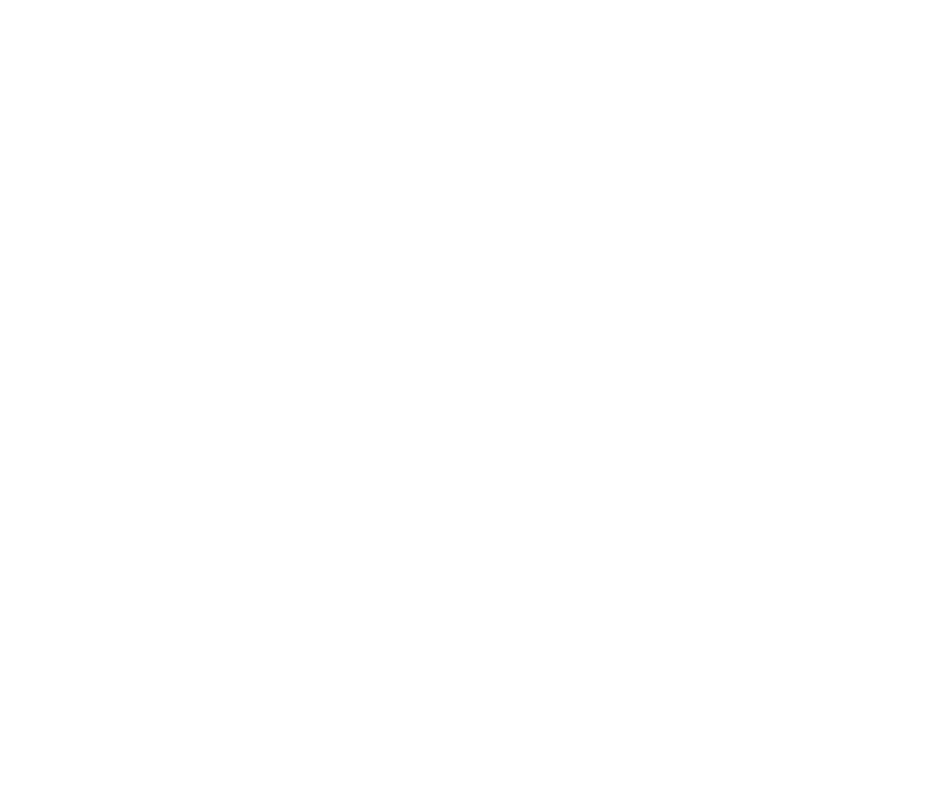

In [19]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the red masks
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue Mask')
plt.axis('off')

plt.show()

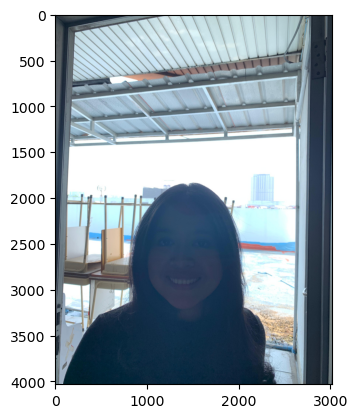

In [45]:
img2 = cv2.imread("gambar3.jpg")
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb2)

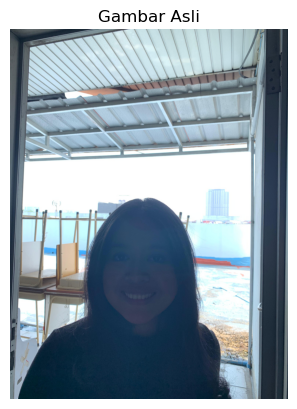

In [47]:
img = cv2.imread("gambar3.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

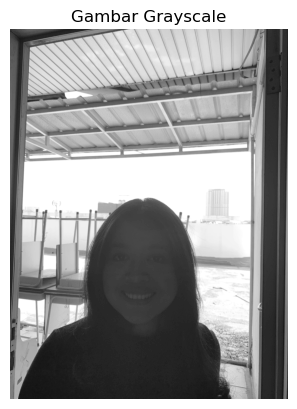

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()

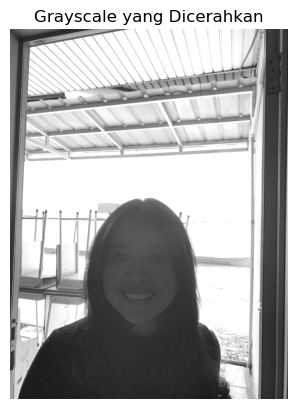

In [51]:
bright = cv2.convertScaleAbs(gray, alpha=1, beta=50)

plt.imshow(bright, cmap='gray')
plt.title("Grayscale yang Dicerahkan")
plt.axis("off")
plt.show()

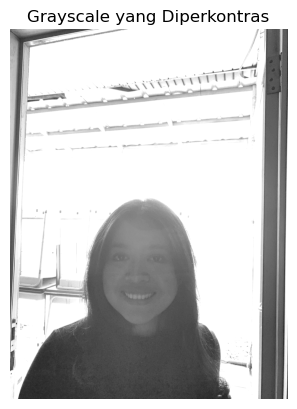

In [53]:
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0)

plt.imshow(contrast, cmap='gray')
plt.title("Grayscale yang Diperkontras")
plt.axis("off")
plt.show()

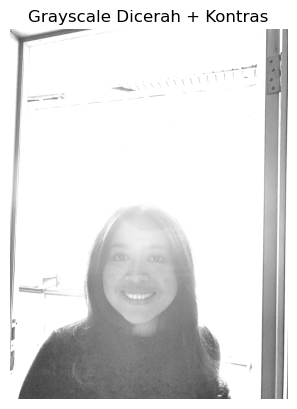

In [55]:
bright_contrast = cv2.convertScaleAbs(bright, alpha=2.0, beta=0)

plt.imshow(bright_contrast, cmap='gray')
plt.title("Grayscale Dicerah + Kontras")
plt.axis("off")
plt.show()